# Credit Card User Segmentation

---

## I. Introduction
Author : Ayudha Amari Hirtranusi  

Objective: This project is meant to perform customer segmentation on credit card users based on their credit card usage behavior. This project will include steps like data preprocessing, exploratory data analysis, model training, model evaluation, and model inference. The goal of this project is to perform customer segmentation on credit card usage data to identify at least 3 distinct customer clusters and to provide actionable business recommendations for each segment. The project is aimed to be completed within 2 weeks, enabling the marketing team to implement targeted marketing strategies and enhance customer engagement.

---

### Background
Imagine you are a Data Scientist at Bank XYZ. The marketing team has asked you to perform Customer Segmentation on the credit card data you have obtained previously. This data represents credit card usage information over the last 6 months.

In response to this request, you will create a Clustering process and provide business recommendations for each Customer Cluster formed. Additionally, the marketing team has requested other business insights from the data you are using, which you will address in the Exploratory Data Analysis (EDA) section.

### Problem Identification
In this section, we will define the problem that we are trying to solve. We will also define the goals and objectives of the project using the SMART framework (Specific, Measurable, Achievable, Relevant, Time-bound).
- Specific : Perform a Customer Segmentation on the credit card data and provide business recommendations for each Customer Cluster formed.
- Measurable : The clustering model should identify at least 3 distinct customer segments.
- Achievable : The data has been obtained and contains sufficient features to conduct clustering.
- Relevant : The segmentation will help the marketing team recommend personalized strategies for different customer segments, improving marketing effectiveness.
- Time-bound : The project should be completed within 2 week.

Therefore, the goal of this project is to perform customer segmentation on credit card usage data to identify at least 3 distinct customer clusters and to provide actionable business recommendations for each segment. The project is aimed to be completed within 2 weeks, enabling the marketing team to implement targeted marketing strategies and enhance customer engagement.

The dataset we're using contains information as follows:
column_name                        | data_type | description                                                                                             |
-----------------------------------|-----------|---------------------------------------------------------------------------------------------------------|
CUST_ID                            | INT64     | Identification of Credit Card holder                                                                    |
BALANCE                            | FLOAT64   | Balance amount left in their account to make purchases                                                  |
BALANCE_FREQUENCY                  | FLOAT64   | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
PURCHASES                          | FLOAT64   | Amount of purchases made from account                                                                   |
ONEOFF_PURCHASES                   | FLOAT64   | Maximum purchase amount done in one-go                                                                  |
INSTALLMENTS_PURCHASES             | FLOAT64   | Amount of purchase done in installment                                                                  |
CASH_ADVANCE                       | FLOAT64   | Cash in advance given by the user                                                                       |
PURCHASES_FREQUENCY                | FLOAT64   | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
ONEOFF_PURCHASES_FREQUENCY         | FLOAT64   | How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
PURCHASES_INSTALLMENTS_FREQUENCY   | FLOAT64   | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  |
CASH_ADVANCE_FREQUENCY             | FLOAT64   | How frequently the cash in advance being paid                                                           |
CASH_ADVANCE_TRX                   | INT64     | Number of Transactions made with 'Cash in Advance'                                                      |
PURCHASES_TRX                      | INT64     | Number of purchase transactions made                                                                    |
CREDIT_LIMIT                       | FLOAT64   | Limit of Credit Card for user                                                                           |
PAYMENTS                           | FLOAT64   | Amount of Payment done by user                                                                          |
MINIMUM_PAYMENTS                   | FLOAT64   | Minimum amount of payments made by user                                                                 |
PRC_FULL_PAYMENT                   | FLOAT64   | Percent of full payment paid by user                                                                    |
TENURE                             | INT64     | Tenure of credit card service for user                                                                  |


## II. Query SQL
The dataset was loaded from Google Cloud Platform using BIGQUERY with the following SQL query:
```sql
SELECT *
FROM
    `project-table.credit-card-information`
WHERE (MOD(CUST_ID,2) != 0)
ORDER BY CUST_ID;
```


## III. Import Libraries

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import library for PCA and clustering (algorithm)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

# import library for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# import library for scaling, imputation and outliers
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer

# Libraries for saving and loading models
import pickle
import json

# Libraries for statistical analysis
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor

# library for ignore warnings
import warnings
warnings.filterwarnings("ignore")

## IV. Data Loading

Then, we will load the data that we will use in this project. The data is provided in the form of a CSV file. We will load the data using the pandas library.

In this section, we will prepare the data before further exploring the data. The data preparation part will include process like :
- checking the size of the dataset
- check the data type of each column
- checking the duplicate data
- check the missing value
- check the unique value of each column
- dropping the unnecessary columns
- check the statistical summary of the dataset

Then we will handle what we found in the data preparation part if necessary.

In [2]:
# load the dataframe
df_ori = pd.read_csv('P1G6_Set_1_Ayudha_Amari.csv')

#backup the original dataframe
df = df_ori.copy()

We can check the first 10 rows and the last 10 rows of our data as follows

In [3]:
# show the first 10 rows of dataframe
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1,1854.033230,1.000000,1013.50,576.00,437.50,1243.093189,0.500000,0.083333,0.333333,0.083333,5,15,2000.0,654.473825,1524.375697,0.000000,12
1,3,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11
2,5,21.580264,0.909091,284.72,0.00,284.72,0.000000,0.666667,0.000000,0.666667,0.000000,0,16,5000.0,344.161416,155.792859,0.800000,12
3,7,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12
4,9,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333,12
5,11,89.708187,1.000000,1808.60,1808.60,0.00,450.417925,0.916667,0.916667,0.000000,0.166667,3,26,7500.0,1890.186096,139.117341,0.444444,12
6,13,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,3,3,3000.0,577.725789,1683.482088,0.000000,12
7,15,5429.372649,1.000000,493.10,0.00,493.10,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,12000.0,1415.589572,1440.327788,0.000000,12
8,17,1381.080028,1.000000,360.00,0.00,360.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,115.649241,13564.391210,0.000000,12
9,19,237.344299,1.000000,1266.03,170.00,1096.03,0.000000,1.000000,0.083333,1.000000,0.000000,0,46,1800.0,729.118157,189.433393,0.500000,12


In [4]:
# show the last 10 rows of dataframe
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,8931,837.631184,1.000000,0.00,0.00,0.00,867.928181,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,47.144400,5413.385529,0.000000,12
4466,8933,125.793836,1.000000,630.00,0.00,630.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,373.891965,166.265696,0.200000,12
4467,8935,0.000000,0.000000,102.72,0.00,102.72,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,0.000000,NaN,0.000000,12
4468,8937,108.889031,1.000000,1145.85,445.85,700.00,0.000000,1.000000,0.916667,0.750000,0.000000,0,22,5000.0,874.238956,179.080958,0.833333,12
4469,8939,106.894095,0.909091,62.73,0.00,62.73,0.000000,0.272727,0.000000,0.181818,0.000000,0,3,5000.0,540.130507,146.069474,0.272727,11
4470,8941,10571.411070,1.000000,7739.48,0.00,7739.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,44,8000.0,2688.447014,76406.207520,0.000000,12
4471,8943,2584.317807,1.000000,0.00,0.00,0.00,6036.492283,0.000000,0.000000,0.000000,0.250000,7,0,3000.0,6024.595066,826.013735,0.181818,12
4472,8945,655.712971,1.000000,264.35,202.80,61.55,0.000000,0.333333,0.083333,0.166667,0.000000,0,6,1500.0,180.129661,295.417192,0.000000,12
4473,8947,6593.820644,1.000000,388.66,388.66,0.00,4621.934580,0.583333,0.583333,0.000000,0.416667,7,7,7000.0,1624.583114,2503.402340,0.000000,12
4474,8949,37.307085,0.833333,363.38,0.00,363.38,36.363896,0.833333,0.000000,0.666667,0.166667,1,6,1200.0,284.093261,92.369903,0.000000,6


In [5]:
# checking the shape of our dataframe
df.shape

(4475, 18)

Our dataframe contains of 4475 rows and 18 columns.

In [6]:
# checking the data types of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Looking at the output above, we can see that our dataframe has correct datatypes if we take a look at our dataset description. But, in reality, there are column that should be categorical data type, especially the column where the description is '1' for higher frequency, and '0' for lower frequency. Those data should be an ordinal categorical instead of numeric because it describe an ordinal rank as they represent levels or ranks . Therefore, we will convert the following columns to categorical data type: `BALANCE_FREQUENCY`, `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, and `PURCHASES_INSTALLMENTS_FREQUENCY`

but the main key point here is columns related to **frequency are ordinal categorical, as they represent levels or ranks (e.g., 0 to 1 scale).**

The details of our data should be as follows :
1. Numerical Variables:  
`BALANCE`: Balance amount left in the account.  
`PURCHASES`: Total amount of purchases made.  
`ONEOFF_PURCHASES`: Maximum purchase amount done in one go.  
`INSTALLMENTS_PURCHASES`: Amount of purchases done in installments.  
`CASH_ADVANCE`: Cash in advance given by the user.  
`CREDIT_LIMIT`: Limit of the credit card.  
`PAYMENTS`: Amount of payments made by the user.  
`MINIMUM_PAYMENTS`: Minimum amount of payments made by the user.  
`CASH_ADVANCE_TRX`: Number of transactions made with 'Cash in Advance'.  
`PURCHASES_TRX`: Number of purchase transactions made.  

2. Categorical Variables:
- Ordinal:  
`BALANCE_FREQUENCY`: How frequently the balance is updated (values between 0 and 1 can be interpreted as ordinal, representing levels of frequency).  
`PURCHASES_FREQUENCY`: How frequently purchases are being made (similarly, values between 0 and 1 represent levels of purchase frequency).  
`ONEOFF_PURCHASES_FREQUENCY`: Frequency of one-time purchases.  
`PURCHASES_INSTALLMENTS_FREQUENCY`: Frequency of installment purchases.  
`CASH_ADVANCE_FREQUENCY`: Frequency of cash advances.  
`TENURE`: Tenure of credit card service for the user (measured in months). This can be treated as ordinal because it shows ordinal rank from low to high retention levels. 

In [7]:
# assign the columns data types
# list of numerical and categorical columns
numerical_cols = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX'
]

categorical_cols = [
    'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE'
]

# outputting the lists
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
Categorical Columns: ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']


Also, we can check how many duplicates in our data as follows

In [8]:
# check the duplicate
print('Number of duplicate rows =', df.duplicated().sum())

Number of duplicate rows = 0


There are no duplicate rows in our dataframe, therefore we dont need to drop any duplicate rows.

In [9]:
# check the missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 155 missing values in column `MINIMUM_PAYMENTS`. We will fill the missing values with appropiate method later on feature engineering part.

In [10]:
# check the amount of unique value of each column
for col in df.columns:
    print(col, ':', df[col].nunique())
    
# print our dataframe rows
print("number of rows->",df.shape[0])

CUST_ID : 4475
BALANCE : 4433
BALANCE_FREQUENCY : 43
PURCHASES : 3203
ONEOFF_PURCHASES : 2093
INSTALLMENTS_PURCHASES : 2292
CASH_ADVANCE : 2169
PURCHASES_FREQUENCY : 46
ONEOFF_PURCHASES_FREQUENCY : 45
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 51
CASH_ADVANCE_TRX : 52
PURCHASES_TRX : 150
CREDIT_LIMIT : 158
PAYMENTS : 4362
MINIMUM_PAYMENTS : 4319
PRC_FULL_PAYMENT : 47
TENURE : 7
number of rows-> 4475


Looking at the output above, we can see that there are high amount of unique value in `CUST_ID` column. This column is an identification of Credit Card holder, therefore it should be unique for each row. We will drop this column since it is not needed for our analysis. Also, `TENURE` column should be investigated further since it only has 7 unique values (low cardinality)

In [11]:
# drop the customer id column
df.drop('CUST_ID', axis=1, inplace=True)

In [12]:
# check the df after drop the customer id column
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1854.033230,1.000000,1013.50,576.00,437.50,1243.093189,0.500000,0.083333,0.333333,0.083333,5,15,2000.0,654.473825,1524.375697,0.000000,12
1,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11
2,21.580264,0.909091,284.72,0.00,284.72,0.000000,0.666667,0.000000,0.666667,0.000000,0,16,5000.0,344.161416,155.792859,0.800000,12
3,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12
4,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333,12


Now, we dropped our CUST_ID. Also, we can see the statistics summary of our dataframe with the following code

In [13]:
# check the statistics summary of our dataframe
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From the output above, we can see that there are few key takeaways that we can get, but the most notable ones are:


- The average balance is 1563, but it ranges from 0 to 18,495, with a high standard deviation (2072), showing a wide spread in customer balances.


- The mean cash advance is 984, but it can go up to 47,137, showing that some customers heavily depend on cash advances.


- Among purchase types, one-off purchases are prominent, with a mean of 596 compared to 407 for installment purchases.


- Only a small fraction of customers (mean of 0.15) pay their balance in full regularly, this means many are revolving credit card users.


- The average payment is 1740, but the high standard deviation (2827) points to some customers making substantial payments, while others make minimal ones.

- Tenure ranging from 6 to 12 months, with an average of 11 months, indicates that most customers have been with the bank for a long time. Also, that column should be encoded into ordinal because its a discrete values of months (higher values meaning the customer retention is longer), ranging from 6 to 12 months, but we don't need to do that since its already encoded as ordinal already.

- Scale between columns are different, therefore we need to scale the data before we do clustering (especially in columns where the desc is about 'frequency' because those columns always ranging only from 0 to 1).

Therefore, the insight that we get from the data preparation now are :
- Scaling our column with appropriate method.
- Impute missing value in column `MINIMUM_PAYMENTS` with appropiate method.

## V. Exploratory Data Analysis (EDA)

This section will include the exploratory data analysis (EDA) of the dataset. The EDA will show exploration of our dataset using visualization. The EDA will answer the relationship between the features using visualization or how is the distribution of the data in the dataset. The EDA will help us to understand the data better especially about the relationship.

In [14]:
# create a copy of dataframe for EDA only
df_eda = df.copy()

### - Relationship between `Tenure`, and columns `PURCHASE`, `BALANCE`, and `PAYMENTS`

Here, we can check if there are any pattern or relationship between `TENURE` and columns `PURCHASE`, `BALANCE`, and `PAYMENTS` with the following code

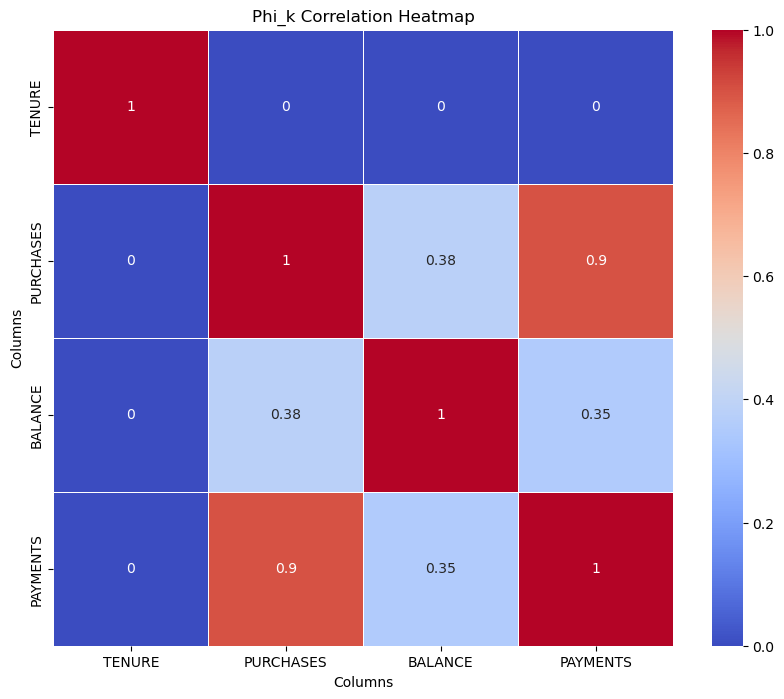

In [15]:
# using phik correlation to see the correlation between the columns
phik_corr = df_eda.loc[:,['TENURE','PURCHASES','BALANCE','PAYMENTS']].phik_matrix(interval_cols=numerical_cols)


# Set heatmap size
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=.5)

# Add title and labels
plt.title('Phi_k Correlation Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Display the heatmap
plt.show()

From the output above, we can see that it turns out no correlation or impact between `TENURE` and columns `PURCHASE`, `BALANCE`, and `PAYMENTS`.

But for further analysis, we can also do the following visualization

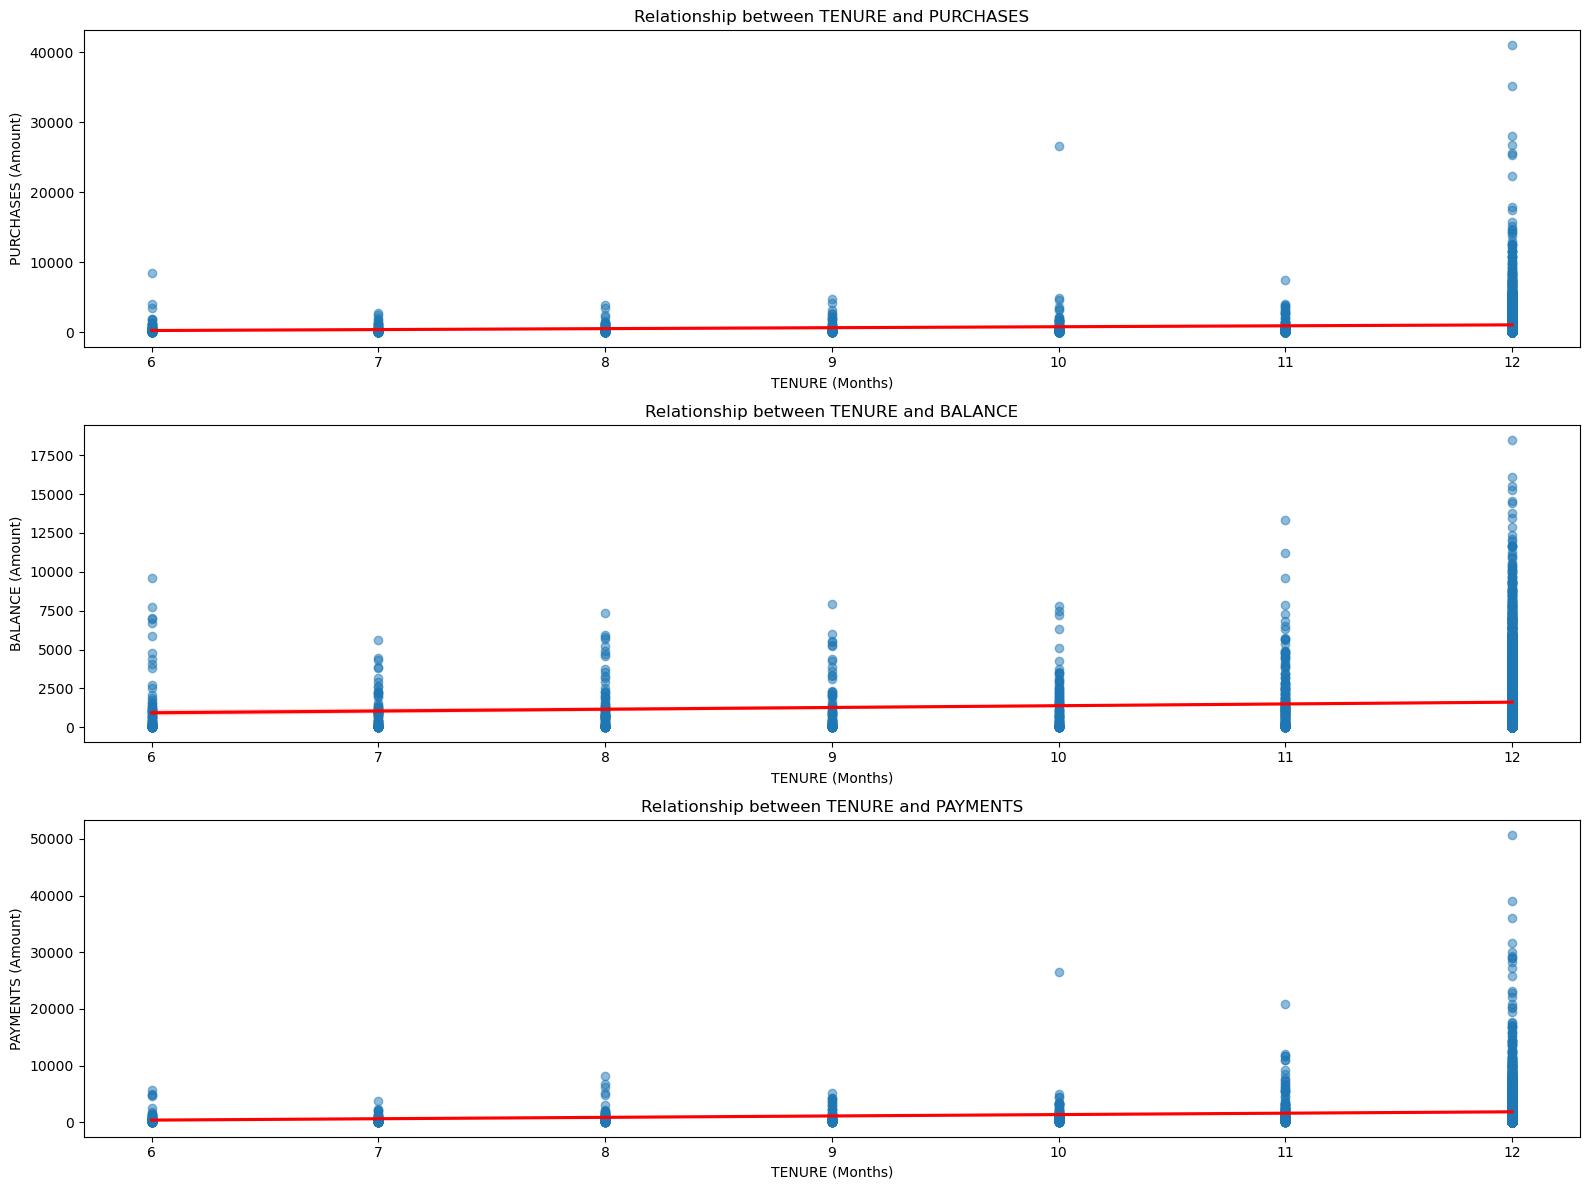

In [16]:
# Plotting the relationships again using scatter plots with regression lines for better clarity
plt.figure(figsize=(16, 12))

# Scatterplot of TENURE vs PURCHASES
plt.subplot(3, 1, 1)
sns.regplot(x='TENURE', y='PURCHASES', data=df_eda, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Relationship between TENURE and PURCHASES')
plt.xlabel('TENURE (Months)')
plt.ylabel('PURCHASES (Amount)')

# Scatterplot of TENURE vs BALANCE
plt.subplot(3, 1, 2)
sns.regplot(x='TENURE', y='BALANCE', data=df_eda, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Relationship between TENURE and BALANCE')
plt.xlabel('TENURE (Months)')
plt.ylabel('BALANCE (Amount)')

# Scatterplot of TENURE vs PAYMENTS
plt.subplot(3, 1, 3)
sns.regplot(x='TENURE', y='PAYMENTS', data=df_eda, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Relationship between TENURE and PAYMENTS')
plt.xlabel('TENURE (Months)')
plt.ylabel('PAYMENTS (Amount)')

plt.tight_layout()
plt.show()


From the visualizations above, we can observe the following patterns:

There is no **significant correlation** between TENURE and any of the other variables (PURCHASES, BALANCE, and PAYMENTS), as all correlations are close to zero. This means that the length of time a customer has held their account (tenure) does not directly influence their spending behavior (purchases), outstanding balances, or payment amounts. Also, we can see the "flat red line" when we plot the scatter plot between those features, this further confirms that there is no correlation between those features.

Therefore, the **bussiness insight** that we can get from those analysis is :

Customer loyalty or tenure does not necessarily predict higher spending or increased balance usage. **Marketing efforts focused purely on long-term customers may not yield higher returns**. Instead, targeting strategies **should focus on other customer attributes beyond tenure**.

### - Relationship Between Credit Limit And Purchase Frequency

Here, we can also check if customers with higher `credit limit` tend to have higher `purchase frequency`

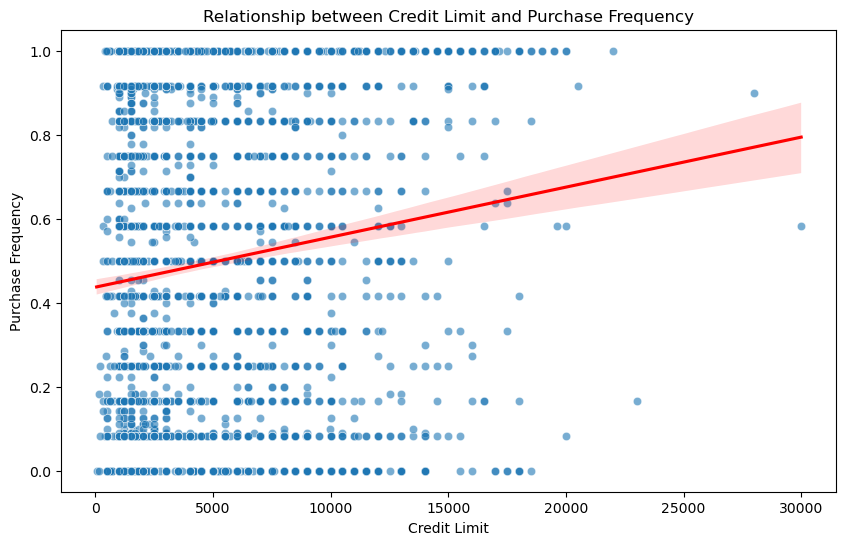

In [17]:
# Plotting the relationship between CREDIT_LIMIT and PURCHASES_FREQUENCY
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', data=df_eda, alpha=0.6)
sns.regplot(x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', data=df_eda, scatter=False, color='red')

plt.title('Relationship between Credit Limit and Purchase Frequency')
plt.xlabel('Credit Limit')
plt.ylabel('Purchase Frequency')
plt.show()


Even tho we can see that there is like a little positive trend between `credit limit` and `purchase frequency` (from the red line ;derive from the reg), but if we see the scatter plot, it seems like there is no correlation between those two columns, the scatter plots showing that the 'dot' are spread out and not forming a clear pattern.

BUT, we can confirm the relationship between the two by categorizing the `credit limit` into few categories and see the `purchase frequency` distribution in each category.

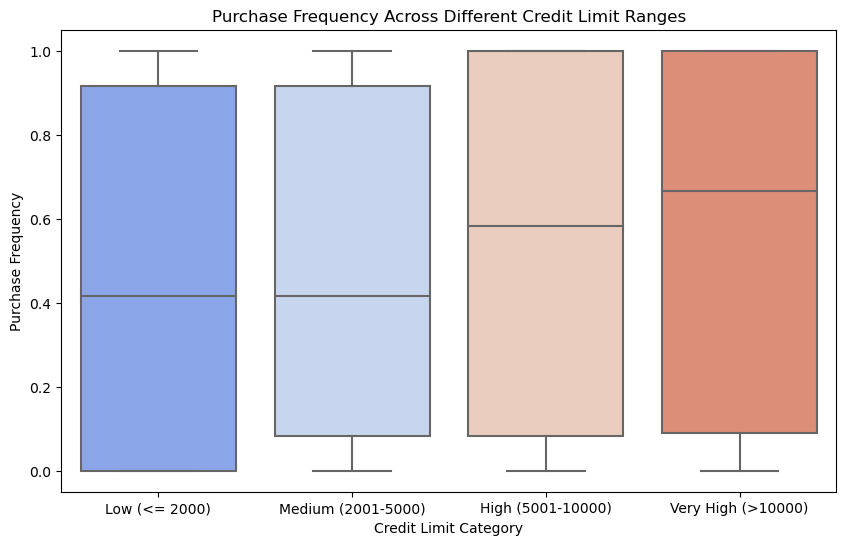

In [18]:
# For a different approach, let's create a boxplot to compare purchase frequency across different ranges of credit limits.

# First, categorize credit limits into bins
df_eda['CREDIT_LIMIT_BIN'] = pd.cut(
    df_eda['CREDIT_LIMIT'], 
    bins=[0, 2000, 5000, 10000, 30000],
    labels=['Low (<= 2000)', 'Medium (2001-5000)', 'High (5001-10000)', 'Very High (>10000)'] # this value derived from the q1,q2,q3 of the credit limit with approximation
)

# Plotting a boxplot to compare purchase frequency across these categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='CREDIT_LIMIT_BIN', y='PURCHASES_FREQUENCY', data=df_eda, palette='coolwarm')

plt.title('Purchase Frequency Across Different Credit Limit Ranges')
plt.xlabel('Credit Limit Category')
plt.ylabel('Purchase Frequency')
plt.show()


From the output above, it turns out if we categorize the `credit limit` into few categories, we can see that the higher the `credit limit`, the higher the `purchase frequency` (shown by the higher median, range, etc). This further confirms that customers with higher credit limits tend to make purchases more frequently.

**Business Insights** :  

- Trend of Purchase Frequency with Increasing Credit Limit:

The scatter plot with the regression line shows a moderate positive relationship between credit limit and purchase frequency. This indicates that as the credit limit increases, customers tend to make purchases more frequently.
Marketing can focus on leveraging this relationship by offering targeted promotions, rewards, or perks to high credit limit customers to further encourage more frequent purchases.

- Behavior Across Credit Limit Categories:

The boxplot reveals that customers in higher credit limit categories (e.g., above 10,000) generally have higher purchase frequency, as indicated by the higher medians.
However, there is still significant variation within each category. For example, some customers with very high credit limits still maintain low purchase frequency. This suggests an opportunity to target these specific segments with customized incentives.


- Segmentation Opportunities:

The insights suggest that customers with medium to high credit limits should be segmented for special marketing strategies. For instance:
Medium (2001-5000): These customers could be encouraged to move to higher purchase frequency levels through loyalty programs, cashback offers, or tiered rewards.
High (5001-10000) and Very High (>10000): These customers should receive more exclusive offers, premium services, or access to special events as a way to boost engagement and loyalty.

**Conclusion**:
The relationship between credit limit and purchase frequency suggests that marketing strategies should **prioritize high credit limit customers** while also identifying **sub-segments that are underutilizing their credit potential**. The suggestion is that the **targeted campaigns can help maximize revenue** within these valuable customer groups.

## VI. Feature Engineering

In this section, we will do feature engineering to prepare the data for model training. The feature engineering will include process like :
- handling missing values
- handling outliers
- handling cardinality
- feature selection
- feature scaling
- feature encoding

### `Handling missing values`

In [19]:
# check the missing values in the dataframe
print("Missing values in dataset_2:")
print(df.isnull().sum())

Missing values in dataset_2:
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


As shown in data loading before, there are *155* missing values in column `MINIMUM_PAYMENTS`. We will fill the missing values here by using the appropriate method for that column, first we will check the distribution of the column `MINIMUM_PAYMENTS` with the following code. If the distribution is normal, we will fill the missing values with the mean, if not, we will fill the missing values with the median.

But first, we need to conduct first if the missing values is happening because of MCAR, MAR, or MNAR. 

- MCAR (Missing Completely at Random): If the missing values are independent of both observed and unobserved data, the missingness is purely random.

- MAR (Missing at Random): If the missingness depends only on observed data but not on the unobserved missing data itself, the missingness is considered MAR.

- MNAR (Missing Not at Random): If the missingness depends on the unobserved data itself, it is MNAR.

In [20]:
# check the first 10 values where the MINIMUM_PAYMNETS is missing
df.loc[df['MINIMUM_PAYMENTS'].isnull()].head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
33,0.000000,0.000000,19.25,0.00,19.25,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,4000.0,0.000000,NaN,0.0,12
62,71.310815,0.090909,0.00,0.00,0.00,1849.578078,0.000000,0.000000,0.000000,0.083333,1,0,6000.0,0.000000,NaN,0.0,12
110,0.000000,0.000000,140.04,0.00,140.04,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,129.905883,NaN,0.0,12
117,269.816561,0.636364,1965.95,1965.95,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,5500.0,0.000000,NaN,0.0,12
182,0.859447,0.454545,23.00,23.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,0.000000,NaN,0.0,12
190,14.891634,0.222222,0.00,0.00,0.00,116.193463,0.000000,0.000000,0.000000,0.111111,1,0,3000.0,0.000000,NaN,0.0,9
226,2677.842539,1.000000,149.80,149.80,0.00,2838.173232,0.142857,0.142857,0.000000,0.142857,13,1,3000.0,0.000000,NaN,0.0,7
261,2676.253141,0.909091,0.00,0.00,0.00,2832.570661,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,0.000000,NaN,0.0,12
282,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.0,6
292,0.000000,0.000000,52.50,0.00,52.50,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,3000.0,57.506797,NaN,0.0,12


In [21]:
# check the last 10 values where the MINIMUM_PAYMNETS is missing
df.loc[df['MINIMUM_PAYMENTS'].isnull()].tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4105,0.000000,0.000000,37.65,0.00,37.65,0.000000,0.250000,0.000000,0.25,0.000000,0,3,1500.0,0.000000,NaN,0.0,12
4172,341.901741,0.500000,152.84,152.84,0.00,1008.117498,0.333333,0.333333,0.00,0.333333,9,3,1200.0,0.000000,NaN,0.0,6
4174,3737.175713,1.000000,0.00,0.00,0.00,3017.170336,0.000000,0.000000,0.00,0.166667,4,0,4500.0,0.000000,NaN,0.0,12
4180,141.656741,0.181818,1109.83,1109.83,0.00,379.155222,0.166667,0.166667,0.00,0.083333,1,3,1200.0,0.000000,NaN,0.0,12
4288,9164.724752,1.000000,3407.69,2074.16,1333.53,2063.860557,1.000000,0.833333,1.00,0.166667,5,77,9500.0,0.000000,NaN,0.0,12
4314,0.228572,0.125000,60.00,60.00,0.00,0.000000,0.125000,0.125000,0.00,0.000000,0,1,1500.0,438.738982,NaN,0.0,8
4321,53.697916,1.000000,114.49,114.49,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0,1,7500.0,0.000000,NaN,0.0,12
4401,0.000000,0.000000,609.21,0.00,609.21,0.000000,0.900000,0.000000,0.80,0.000000,0,9,1000.0,684.523752,NaN,0.0,10
4464,39.642014,1.000000,0.00,0.00,0.00,45.175571,0.000000,0.000000,0.00,0.083333,1,0,5000.0,0.000000,NaN,0.0,12
4467,0.000000,0.000000,102.72,0.00,102.72,0.000000,1.000000,0.000000,1.00,0.000000,0,12,1500.0,0.000000,NaN,0.0,12


Based on output above, the starting assumption is that we can assume it as MCAR/MAR/MNAR based on the following :
- MCAR -> a random system error causing some data points to be missing.
- MAR -> if customers with higher balances are less likely to have their minimum payments recorded, this would be MAR because the missingness is related to balance (an observed variable).
- MNAR -> customers who do not make minimum payments might intentionally not report that information, leading to systematic missingness.

Therefore, 
If missing values in MINIMUM_PAYMENTS are associated with specific ranges of credit limit or balances, it could suggest **MAR**.
If missingness is random across all customer profiles, it leans towards **MCAR**.
If missingness is higher in accounts where payments are consistently not made, it could indicate **MNAR**. We can check it with the following approach :

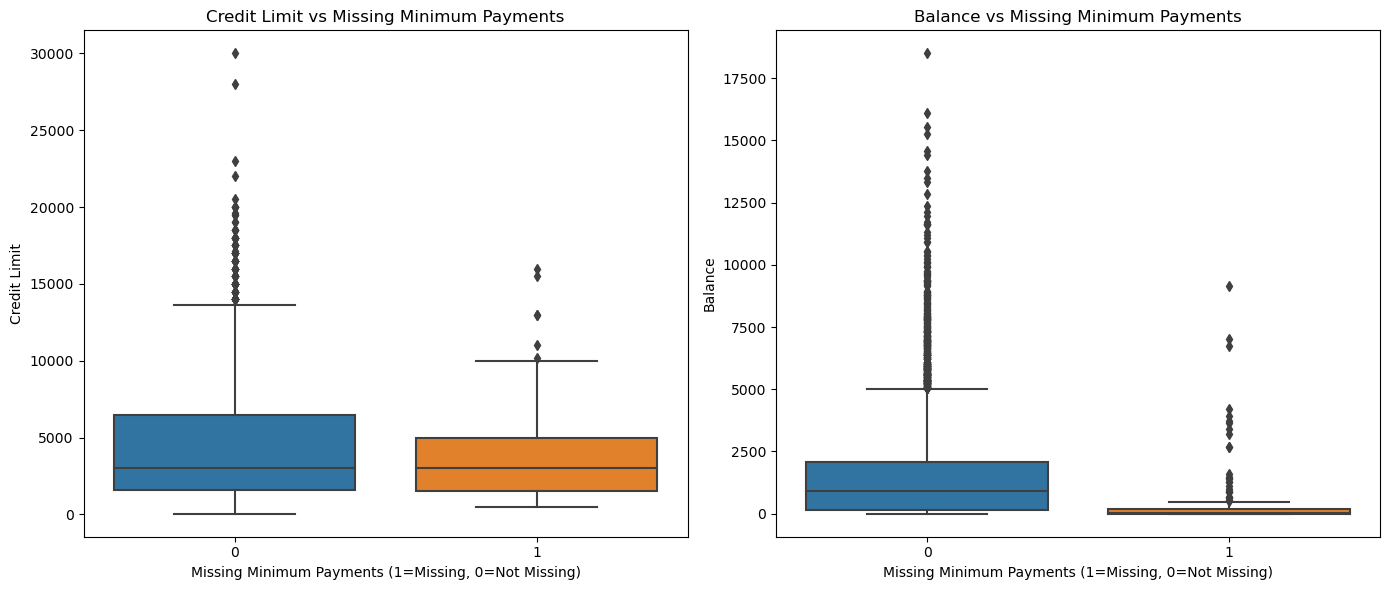

In [22]:
# creating a new column to indicate whether 'MINIMUM_PAYMENTS' is missing (1) or not missing (0)
df_eda['MISSING_MINIMUM_PAYMENTS'] = df_eda['MINIMUM_PAYMENTS'].isnull().astype(int)

# analyzing the relationship between missingness and other variables using boxplots
plt.figure(figsize=(14, 6))

# relationship with 'CREDIT_LIMIT'
plt.subplot(1, 2, 1)
sns.boxplot(x='MISSING_MINIMUM_PAYMENTS', y='CREDIT_LIMIT', data=df_eda)
plt.title('Credit Limit vs Missing Minimum Payments')
plt.xlabel('Missing Minimum Payments (1=Missing, 0=Not Missing)')
plt.ylabel('Credit Limit')

# relationship with 'BALANCE'
plt.subplot(1, 2, 2)
sns.boxplot(x='MISSING_MINIMUM_PAYMENTS', y='BALANCE', data=df_eda)
plt.title('Balance vs Missing Minimum Payments')
plt.xlabel('Missing Minimum Payments (1=Missing, 0=Not Missing)')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

- Credit Limit vs Missing Minimum Payments:
The boxplot shows that customers with missing values in MINIMUM_PAYMENTS tend to have lower credit limits on average compared to those without missing values.
This suggests that the missingness might be related to the credit limit, indicating a Missing at Random (MAR) pattern.

- Balance vs Missing Minimum Payments:
On the other hand, the boxplot shows that customers with missing MINIMUM_PAYMENTS generally have lower balances compared to those with recorded minimum payments with significance difference. This further supports the idea that the missingness is related to observable factors like balance and credit limit, which points towards a MAR mechanism. In this case, we should focus on `Balance` column to fill the missing values in `MINIMUM_PAYMENTS` column because the difference is huge compared to the other one.

Conclusion:
The missingness in the MINIMUM_PAYMENTS column is likely **Missing at Random (MAR)** because it is associated with observable variables that is balance. This implies that imputing the missing values based on other variables (group-based imputation) would be a suitable approach for handling this missing data. ​

First, we have to check if the `balance` and `minimum_payments` column are skewed or not, if it is skewed, we will fill the missing values with the median, if not, we will fill the missing values with the mean.

In [23]:
# check the skewness of `balance` and `minimum_payments`
print('Skewness of BALANCE:', df['BALANCE'].skew())
print('Skewness of MINIMUM_PAYMENTS:', df['MINIMUM_PAYMENTS'].skew())

Skewness of BALANCE: 2.3290088807150915
Skewness of MINIMUM_PAYMENTS: 14.669771084332647


Both columns shows an extreme skew, therefore we have to use the median approach here. Therefore, the missing values in `MINIMUM_PAYMENTS` column will be filled with the values of `MINIMUM_PAYMENTS` where the `BALANCE` is the median.

In [24]:
# check the value of `minimum_payments` where the `balance` is the median
median_balance = df['BALANCE'].median()

# show the values of `minimum_payments` where `balance` is the median
df.loc[df['BALANCE'] == median_balance, 'MINIMUM_PAYMENTS']

2844    369.605826
Name: MINIMUM_PAYMENTS, dtype: float64

Based on output above, we will fill the missing value with `369.605826` since its the output of what we get.

In [25]:
# fill the missing values
df['MINIMUM_PAYMENTS'].fillna(df.loc[df['BALANCE'] == median_balance, 'MINIMUM_PAYMENTS'].values[0], inplace=True)

Now we can check if there are still missing values in our dataset with the following code

In [26]:
# check the missing values in the dataframe
print("Missing values in dataframe:")
print(df.isnull().sum())

Missing values in dataframe:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


Now, there are no more missing values in our dataframe. Next, we will handle the outliers in our dataset.

### `Handling Outliers`

We will check the amount of outliers in our numerical cols first, if its more than 5% of the total data, we will handle the outliers, if not, we will leave it as it is.

In [27]:
# check the outliers in the dataframe
# create an empty list of cols to handle the outliers
outliers_cols_list = []


for col in numerical_cols:
    # count the outliers in the numerical columns
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # calculate the IQR
    iqr = q3 - q1
    
    # calculate the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # count the outliers
    outliers = df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    # check if its more than 5 percent
    if outliers_percentage > 5:
        outliers_cols_list.append(col)        
    print("Outliers percentage in",col,":",outliers_percentage,"%")


Outliers percentage in BALANCE : 8.022346368715084 %
Outliers percentage in PURCHASES : 9.474860335195531 %
Outliers percentage in ONEOFF_PURCHASES : 11.687150837988828 %
Outliers percentage in INSTALLMENTS_PURCHASES : 9.87709497206704 %
Outliers percentage in CASH_ADVANCE : 11.262569832402235 %
Outliers percentage in CREDIT_LIMIT : 2.6815642458100557 %
Outliers percentage in PAYMENTS : 9.251396648044691 %
Outliers percentage in MINIMUM_PAYMENTS : 10.70391061452514 %
Outliers percentage in CASH_ADVANCE_TRX : 8.983240223463687 %
Outliers percentage in PURCHASES_TRX : 8.938547486033519 %


It turns out that all the columns is more than 5 percent, meaning we can handle all the columns with capping method. Now, we have list of columns we need to handle the outlier for as follows:

In [28]:
outliers_cols_list

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX']

For each column, we will check the skewness.

In [29]:
# check the skewness of cols in outliers_cols_list
print("Skewness of columns in outliers_cols_list:")
print(df[outliers_cols_list].skew())

Skewness of columns in outliers_cols_list:
BALANCE                    2.329009
PURCHASES                  7.071706
ONEOFF_PURCHASES           9.951057
INSTALLMENTS_PURCHASES     6.330630
CASH_ADVANCE               5.638109
PAYMENTS                   5.747503
MINIMUM_PAYMENTS          14.918829
CASH_ADVANCE_TRX           6.420104
PURCHASES_TRX              4.747507
dtype: float64


It turns out that all columns have an extreme skewness (skew>1),therefore we will use winsorizer with 3 fold to cap the outliers.

In [30]:
# create a winsorizer object to handle outlier
outlier_handler = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=outliers_cols_list)

In [31]:
# handle the outlier with fit_transform
df[outliers_cols_list] = outlier_handler.fit_transform(df[outliers_cols_list])

Now that we handle the outliers, we can see the skewness for each column after we handle the outliers. The skewness should be closer to zero.

In [32]:
# check the skewness of cols in outliers_cols_list
print("Skewness of columns in outliers_cols_list after outlier handling:")
print(df[outliers_cols_list].skew())

Skewness of columns in outliers_cols_list after outlier handling:
BALANCE                   1.715785
PURCHASES                 1.785908
ONEOFF_PURCHASES          1.707236
INSTALLMENTS_PURCHASES    1.752872
CASH_ADVANCE              1.674018
PAYMENTS                  1.728184
MINIMUM_PAYMENTS          1.689447
CASH_ADVANCE_TRX          1.792205
PURCHASES_TRX             1.738371
dtype: float64


Now, we can see that the skewness for each column is closer to zero, therefore we have successfully handle the outliers.

### `Feature Selection`

We will do feature selection by checking the correlation between columns, if the correlation is high, then we can assume those column give the same information, therefore we can drop one of them.

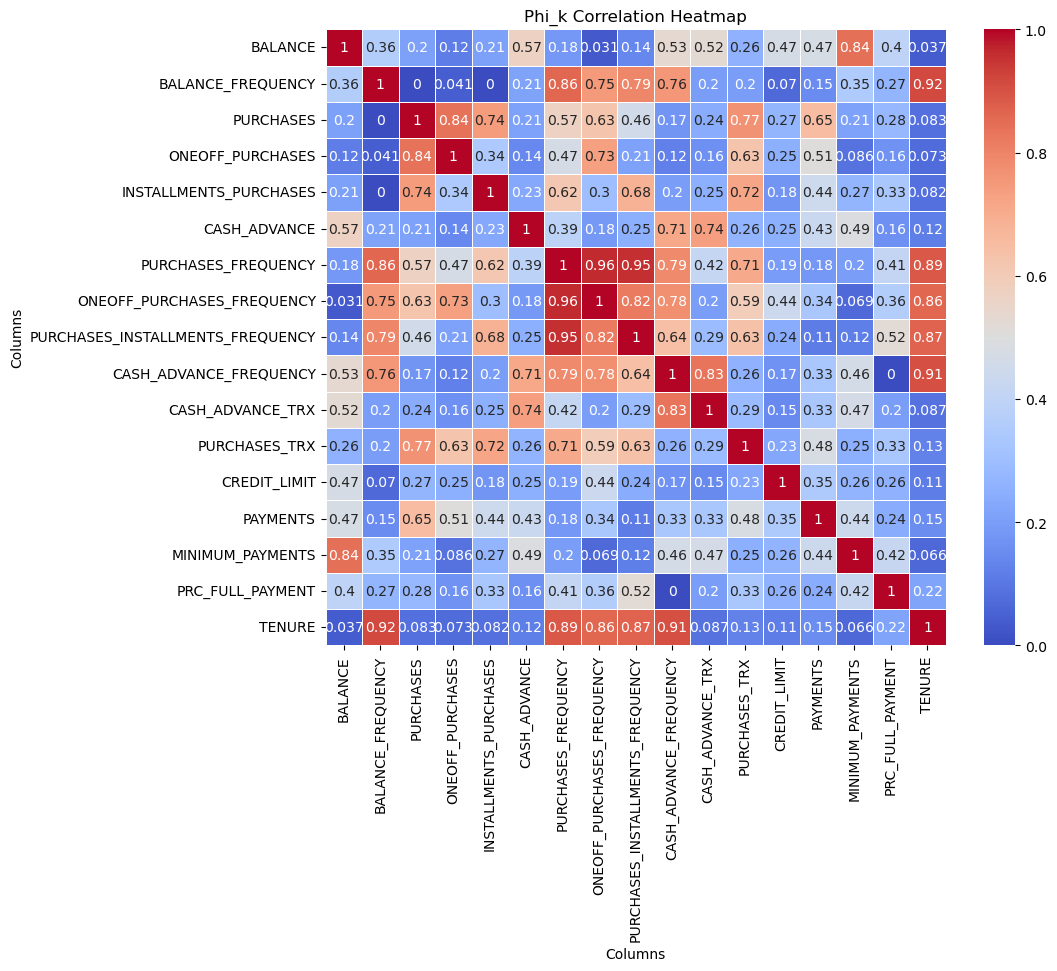

In [33]:
# see the correlation between columns using phi_k correlation
correlation_df = df.copy()

# calculate the phi_k correlation
correlation_matrix = correlation_df.phik_matrix(interval_cols=numerical_cols)

# Set heatmap size
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=.5)

# Add title and labels
plt.title('Phi_k Correlation Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Display the heatmap
plt.show()

Here, we can see that there are some features who has high correlation between each other >0.9, but since in this case we are dealing with unsupervised learning (we dont have target column), we can't see the correlation between the features and the target column, therefore we will not drop any columns. This is because those highly correlated features turns out might be important for the clustering process. So the best approach here is to keep all the columns. *Notes* : Later on, we will also do feature reduction using PCA, therefore, the feature selection is not necessary because PCA will do the feature reduction for us.

### `Features Scaling`

Now, we can do the scaling for our data. Since we have columns that **have different scale**, and we **already handle the outliers before**, also we will use pca & k-means later on, therefore, it's the best to use **standardscaler()** as our scaling method. This is because it shifts data to a mean of zero, advantageous for methods relying on zero-centered input, like **principal component analysis (PCA)** or **clustering algorithm (k-means)**.

In [34]:
# create a scaler object of standard scaler
scaler = StandardScaler()

# fit and transform the scaler to our dataframe
df_scaled = scaler.fit_transform(df)

We can see our data that has been scaled as follows

In [35]:
pd.DataFrame(df_scaled, columns=df.columns).head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.177090,0.516662,0.150876,0.213452,0.200158,0.308438,0.023385,-0.398995,-0.076851,-0.262667,0.495081,0.108520,-0.691320,-0.512286,1.266880,-0.519718,0.362580
1,-0.736279,0.135005,0.515978,0.456858,0.699718,-0.616167,1.038848,0.845973,0.685379,-0.677232,-0.628278,0.344320,-0.137129,-0.089683,-0.692267,2.507456,-0.389992
2,-0.793627,0.135005,-0.481906,-0.621130,-0.102110,-0.616167,0.437093,-0.678477,0.761602,-0.677232,-0.628278,0.167470,0.139967,-0.697339,-0.672227,2.247984,0.362580
3,-0.796382,-1.773283,-0.574439,-0.621130,-0.312954,-0.616167,-0.597175,-0.678477,-0.286464,-0.677232,-0.628278,-0.598877,0.139967,-0.765790,-0.765994,0.109304,0.362580
4,-0.441311,0.516662,1.421121,1.732652,1.020129,-0.427784,1.264506,1.836867,1.600052,-0.262667,-0.403606,1.287516,-0.137129,0.052008,-0.575210,-0.231417,0.362580
5,-0.757537,0.516662,0.841243,1.999400,-0.665416,-0.281149,1.057653,2.395834,-0.915302,0.151903,0.045738,0.756968,0.832706,0.224620,-0.695854,1.017893,0.362580
6,0.747724,0.516662,-0.598880,-0.403791,-0.665416,0.450535,-1.010883,-0.398995,-0.915302,-0.262667,0.045738,-0.598877,-0.414224,-0.558055,1.492314,-0.519718,0.362580
7,2.071077,0.516662,-0.300975,-0.621130,0.310160,-0.616167,0.023385,-0.678477,0.342375,-0.677232,-0.628278,-0.422028,2.079635,-0.058401,1.147795,-0.519718,0.362580
8,-0.073450,0.516662,-0.416542,-0.621130,0.046828,-0.616167,0.437093,-0.678477,0.761602,-0.677232,-0.628278,-0.304128,-0.968415,-0.833610,2.836868,-0.519718,0.362580
9,-0.679329,0.516662,0.370142,-0.374812,1.503030,-0.616167,1.264506,-0.398995,1.600052,-0.677232,-0.628278,1.935964,-0.746739,-0.467773,-0.624563,1.210096,0.362580


Now that we already had data that has been **preprocessed** (impute, handle outliers, feature scaling), we can start the modelling process.

## VII. Model Definition

Here, we will use principle component analysis before we do the clustering process, this needs to be done because we want to reduce the dimensionality of our data. First, we will define our PCA model with the default parameter. Then we will fit our PCA model to our scaled data and find the best number of components to use (parameters).

In [36]:
# define the PCA object with default parameters
pca = PCA()

# fit the PCA object to our scaled dataframe
pca.fit(df_scaled)

PCA()

Now that we fitted the data into PCA model, we can see the explained variance ratio for each component with plot as follows

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

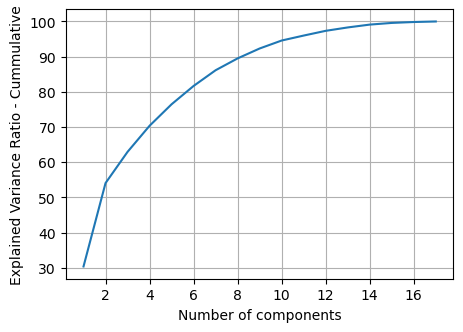

In [37]:
# Plot the Cummulative of Explained Variance Ratio

plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

Here, we can see the explained variance ratio for each component cumulative plot. If we want to retain 90% of the variance. We should use around 7 components. We will define the number of components we will use later on.

Text(0, 0.5, 'Eigenvalues')

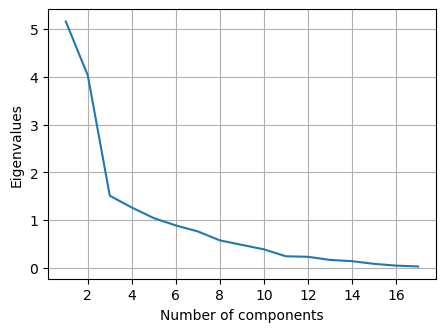

In [38]:
# plot the scree plot
plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

It turns out if we use the `scree plot` method, the number of components we should use is around 5 components. This is because principal component 1-5 eigen values is greater than 1.

But for this case, we will use 9 components since we want to retain 90% of the variance, personally, the more variance we can retain, the better, this is also because when using only 5 components, the information we will retain is <80% which is a huge amount of variance loss, **therefore we will use 9 components based on the explained variance ratio cumulative plot**.

In [39]:
# Check the number of features if we want to retain 90 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.90) + 1
print("the number of principal components used to retain 90% of the information is : ",num_features)

the number of principal components used to retain 90% of the information is :  9


Next, we will train the model using PCA with 9 components in the next section, we will use the KMeans algorithm to do the clustering process.

## VIII. Model Training

Based on previous section, we will train a PCA model with **9 components**. Then we will use the PCA model to transform our scaled data. After that, we will train a KMeans model with the transformed data.

In [40]:
# create a new PCA object with the number of components
pca_9_feats = PCA(n_components=num_features)

# fit into df_scaled
pca_9_feats.fit(df_scaled)

PCA(n_components=9)

We can see the variance of each components as follows

In [41]:
# see the explained variance ratio of each PCA component
print("Explained Variance Ratio of each PCA component:")
print(pca_9_feats.explained_variance_ratio_)

Explained Variance Ratio of each PCA component:
[0.30346808 0.23709549 0.08874545 0.07417732 0.06112904 0.0520697
 0.04469513 0.03368146 0.02814379]


The output above shows that the variance retained by PC1 is 30% and PC2 is 23%, and so on. This values will be used later on when we plot the 2D.

We also can see the cumulative variance or information we retain using 9 components as follows

In [42]:
# print out how many explained variance with 9 PCA components
print(f"the total variance of the 9 features used is {pca_9_feats.explained_variance_ratio_.sum()*100}%")

the total variance of the 9 features used is 92.32054567906617%


Using only 9 features, we can retain 90% of the variance in our data. This is a good result, as it means we can reduce the dimensionality of our data significantly while still retaining most of the information from 17 features used in the original dataset.

Next, we can also compare VIF before vs after PCA to see if the multicollinearity has been reduced.

In [43]:
# VIF dataframe before
vif_data_before = pd.DataFrame()
vif_data_before["feature"] = df.columns

# calculating VIF for each feature
vif_data_before["VIF"] = [variance_inflation_factor(df.values, i)
                    for i in range(len(df.columns))]

print(vif_data_before)

                             feature        VIF
0                            BALANCE   7.816744
1                  BALANCE_FREQUENCY  18.041041
2                          PURCHASES  30.945922
3                   ONEOFF_PURCHASES  17.071203
4             INSTALLMENTS_PURCHASES  10.434189
5                       CASH_ADVANCE   4.673805
6                PURCHASES_FREQUENCY  27.703308
7         ONEOFF_PURCHASES_FREQUENCY   8.551129
8   PURCHASES_INSTALLMENTS_FREQUENCY  22.342234
9             CASH_ADVANCE_FREQUENCY   9.094147
10                  CASH_ADVANCE_TRX   9.356570
11                     PURCHASES_TRX   9.085907
12                      CREDIT_LIMIT   4.599106
13                          PAYMENTS   3.718475
14                  MINIMUM_PAYMENTS   5.342453
15                  PRC_FULL_PAYMENT   1.768552
16                            TENURE  16.718319


Here is the comparison after we use PCA.

In [44]:
# transform the df_scaled with pca_3_feats
df_pca_9feats = pd.DataFrame(pca_9_feats.transform(df_scaled))

# VIF dataframe after
vif_data_after = pd.DataFrame()
vif_data_after["features"] = df_pca_9feats.columns+1

# calculating VIF for each feature
vif_data_after["VIF"] = [variance_inflation_factor(df_pca_9feats.values, i)
                    for i in range(len(df_pca_9feats.columns))]

print(vif_data_after)

   features  VIF
0         1  1.0
1         2  1.0
2         3  1.0
3         4  1.0
4         5  1.0
5         6  1.0
6         7  1.0
7         8  1.0
8         9  1.0


As you can see from the output above, the multicollinearity has been reduced significantly after we use PCA. This is because PCA is a technique that transforms the original features into a set of new orthogonal features (principal components) that are uncorrelated with each other. This helps to reduce multicollinearity in the data.

In [45]:
# saving the results of our PCA into variables
results_PCA = pca_9_feats.transform(df_scaled)

Next, we will fit those 9 features into KMeans model with the following code, we then will find the best number of clusters using the elbow method.

`Elbow Method`

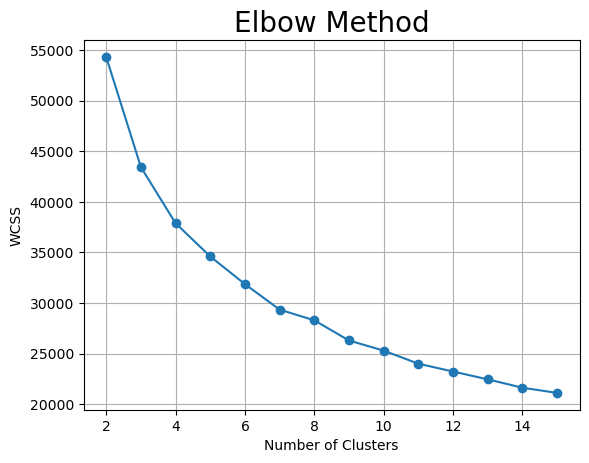

In [46]:
# Elbow Method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,  # specify the number of clusters
                init = 'k-means++',  # use the k-means++ initialization method
                max_iter = 300,  # maximum number of iterations
                n_init = 10,  # number of times the k-means algorithm will be run with different centroid seeds
                random_state = random_state)  # set the random state for reproducibility
    km.fit(results_PCA)  # fit the KMeans model to the PCA-transformed data
    wcss.append(km.inertia_)  # calculate the within-cluster sum of squares and append it to the list

# Plot the elbow curve
plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the elbow method, the best number of clusters we should use is around 3-7 clusters. But one thing to note is that the elbow method is not always accurate, because it requires subjective interpretation, therefore we will check it further using another method called silhouette score. We will do this by defining a function as follows.

In [47]:
# define plot_silouhette to print the silhouette score and silhouette plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
"The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
0, ith_cluster_silhouette_values,
facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
"with n_clusters = %d" % n_clusters),
fontsize=14, fontweight='bold')

Since we know from elbow method the number of optimal clusters is around 3-7, we will define a range of our silouhette score from those set of ranges.

`Silhouette Score`

We will call the function we defined before to find the number of optimal cluster we retreive from elbow method before.

For n_clusters = 3 The average silhouette_score is : 0.2582098126555169
For n_clusters = 4 The average silhouette_score is : 0.2141628083161078
For n_clusters = 5 The average silhouette_score is : 0.21323461486095865
For n_clusters = 6 The average silhouette_score is : 0.22137838771298357
For n_clusters = 7 The average silhouette_score is : 0.23324627366444636


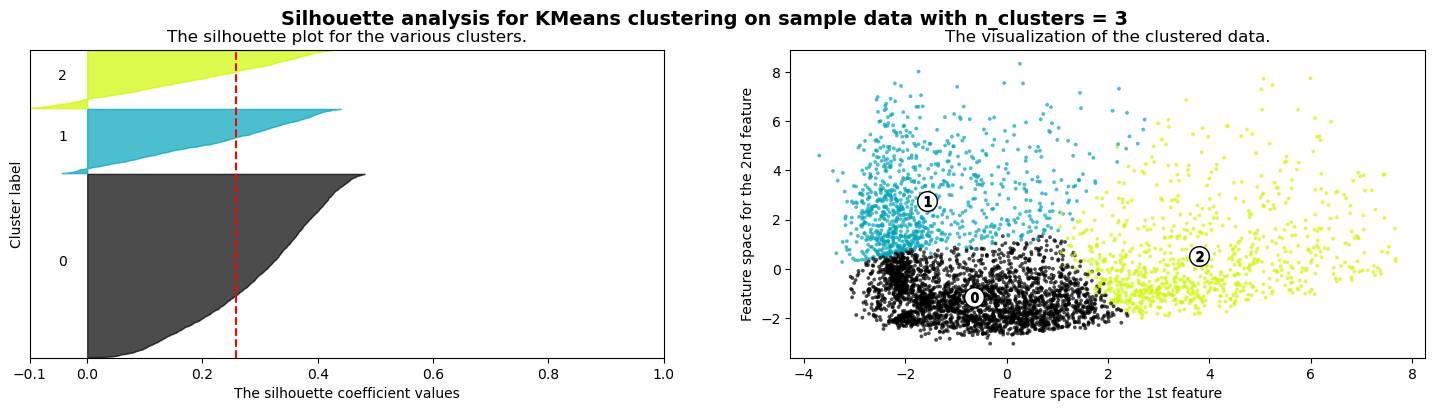

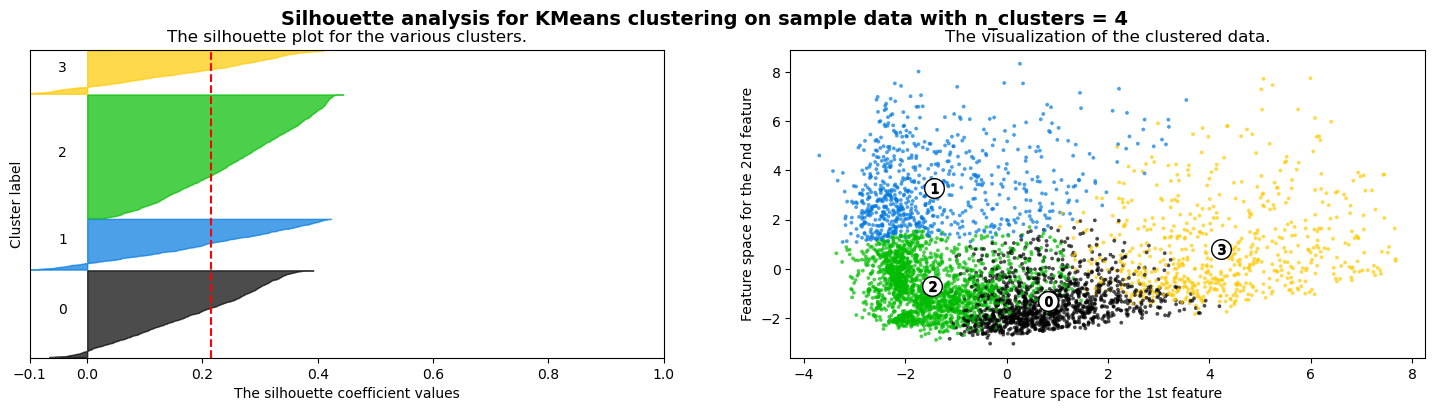

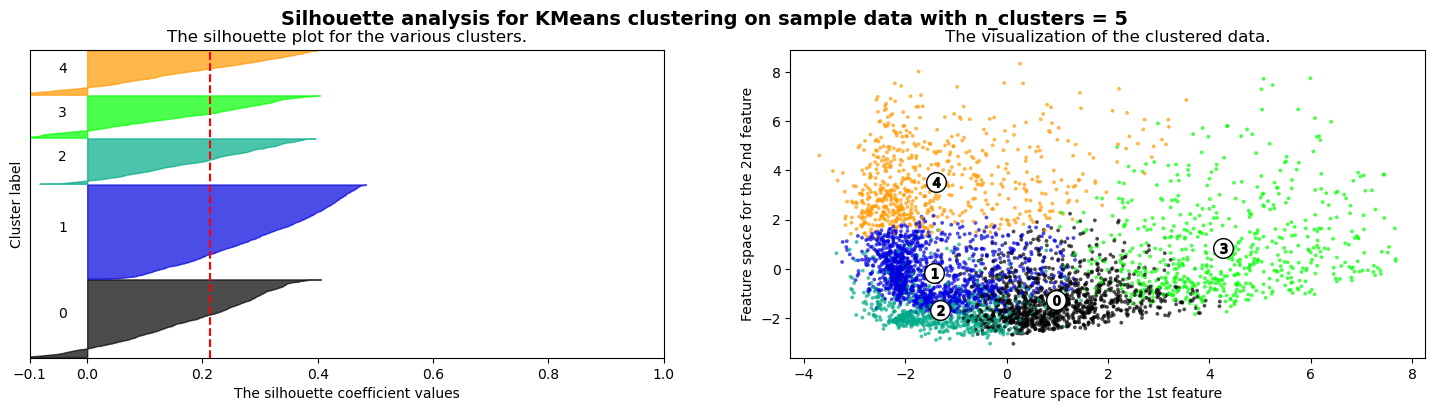

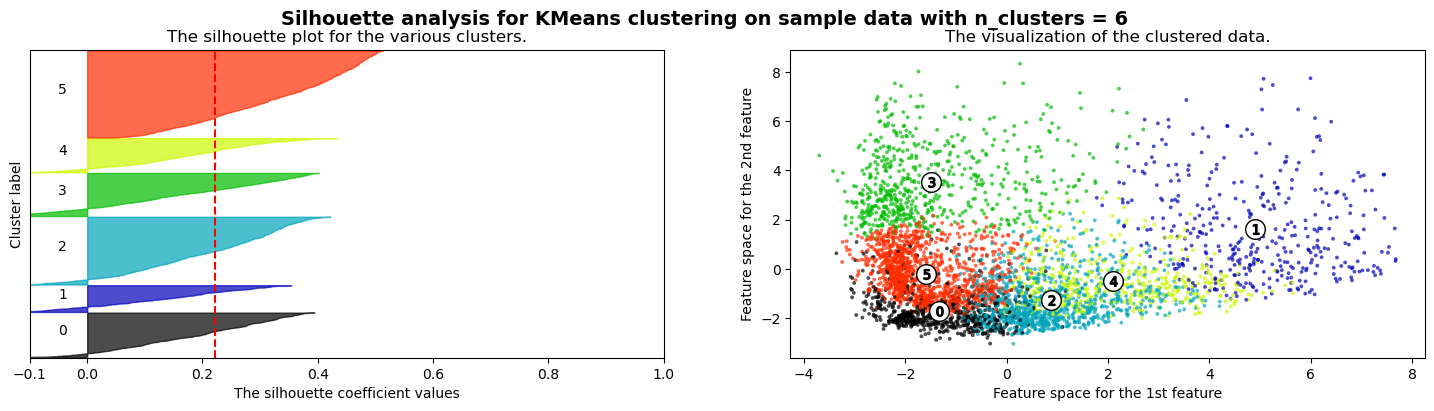

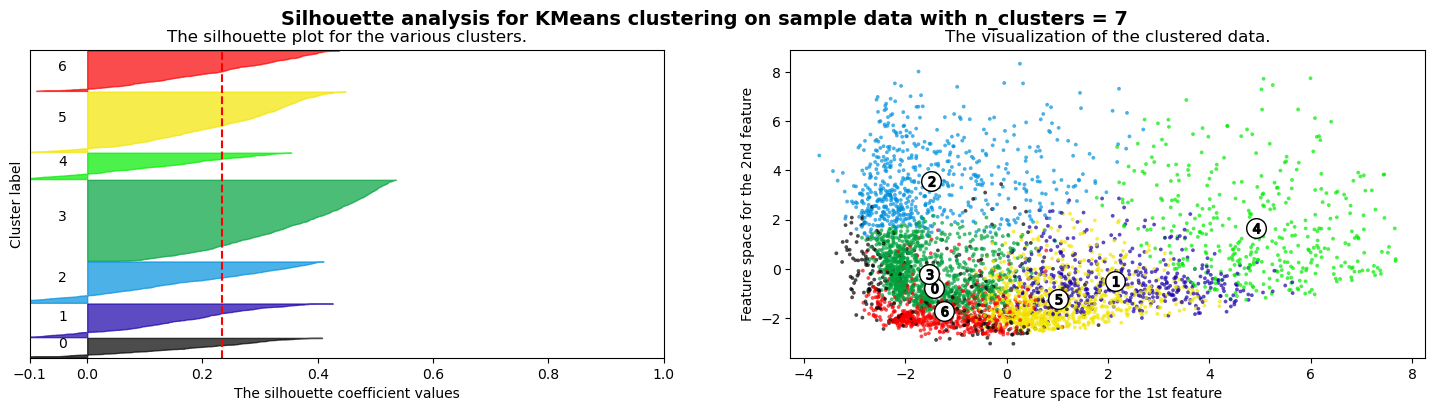

In [48]:
# plot silouhette score
plot_silhouette(range(3, 7+1), results_PCA, random_state)

Here, we can see that the silhouette score is highest at k = 3. Terefore, we will use k = 3 as our number of clusters.

Next, we will train a KMeans model with 3 clusters using the following code. Here we will create a KMeans model with 4 clusters, and then used hyperparameter as follows to ensure that the centroid initialization is not fully based on 'luck', that is why we use `k-means++` as our initialization method. The max_iter is set to 300 to ensure that the algorithm converges to the best solution and the n_init is set to 10 to ensure that the algorithm runs 10 times with different centroid seeds to choose the final model as the one with the lowest cost function.

In [49]:
# create a KMeans object with 4 clusters
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=random_state) # here, the hyperparameters are set to be the common values

Next, we will do the prediction and assign the predicition output to our final dataframe

In [50]:
# create a df_final first for concat/combine the cluster labels with original dataframe for evaluation
df_final = df_ori.copy()

# fit and predict and assign the output of k-means into the cluster column
df_final['cluster'] = km.fit_predict(results_PCA)+1 # add 1 to start the cluster from 1

## IX. Model Evaluation

Now, we can evaluate our model by checking the final dataframe and plot the original data with the cluster, we then will try to find the pattern between each clusters The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns. Firstly, we can see our final dataframe as follows

In [51]:
# display the first 10 rows of the final dataframe
df_final.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1,1854.033230,1.000000,1013.50,576.00,437.50,1243.093189,0.500000,0.083333,0.333333,0.083333,5,15,2000.0,654.473825,1524.375697,0.000000,12,1
1,3,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11,1
2,5,21.580264,0.909091,284.72,0.00,284.72,0.000000,0.666667,0.000000,0.666667,0.000000,0,16,5000.0,344.161416,155.792859,0.800000,12,1
3,7,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12,1
4,9,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333,12,3
5,11,89.708187,1.000000,1808.60,1808.60,0.00,450.417925,0.916667,0.916667,0.000000,0.166667,3,26,7500.0,1890.186096,139.117341,0.444444,12,3
6,13,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,3,3,3000.0,577.725789,1683.482088,0.000000,12,2
7,15,5429.372649,1.000000,493.10,0.00,493.10,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,12000.0,1415.589572,1440.327788,0.000000,12,1
8,17,1381.080028,1.000000,360.00,0.00,360.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,115.649241,13564.391210,0.000000,12,1
9,19,237.344299,1.000000,1266.03,170.00,1096.03,0.000000,1.000000,0.083333,1.000000,0.000000,0,46,1800.0,729.118157,189.433393,0.500000,12,3


Next, we will plot the visualization of our clusters with respect to principal component 1 and principal component 2.

Text(0, 0.5, 'PC2')

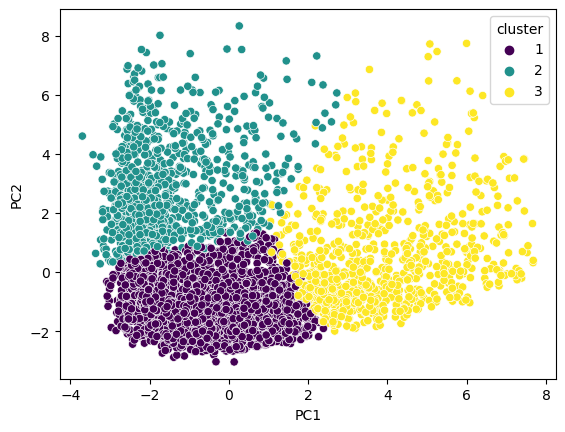

In [52]:
# Cluster visualization in 2D
sns.scatterplot(x=results_PCA[:,0], y=results_PCA[:,1], hue=df_final['cluster'], palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

The plot shows three clusters (purple, blue, and yellow), each reasonably separated from the others. This means that the algorithm successfully identified distinct groups within the data. We can also see the distribution of the cluster as follows.

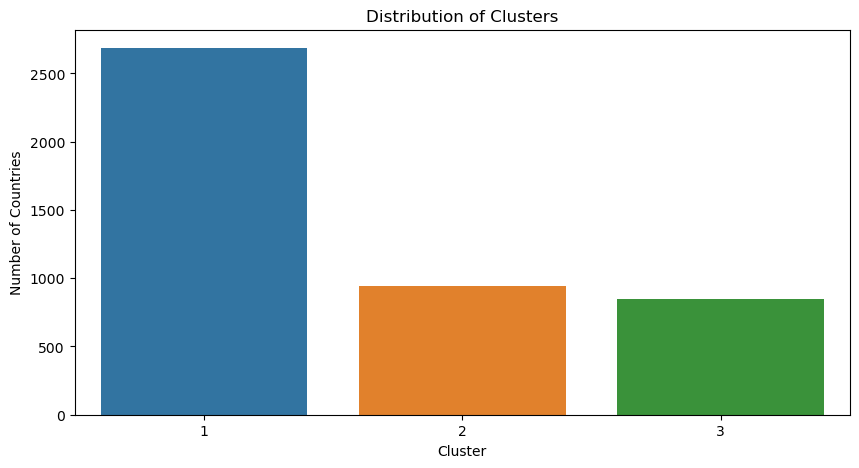

In [53]:
# Distribution of clusters
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=df_final)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.show()

The output above shows the distribution of each cluster across the dataset. We can see that cluster 1 is the largest, followed by cluster 2 and cluster 3.

Now, here comes the important part, we will try to find the pattern between each clusters and the original data. **To "define"** what does it means by cluster 1, cluster 2, and cluster 3. This part is important because we need to provide actionable business recommendations for each segment. We will call this part as **"Cluster Profiling"**.

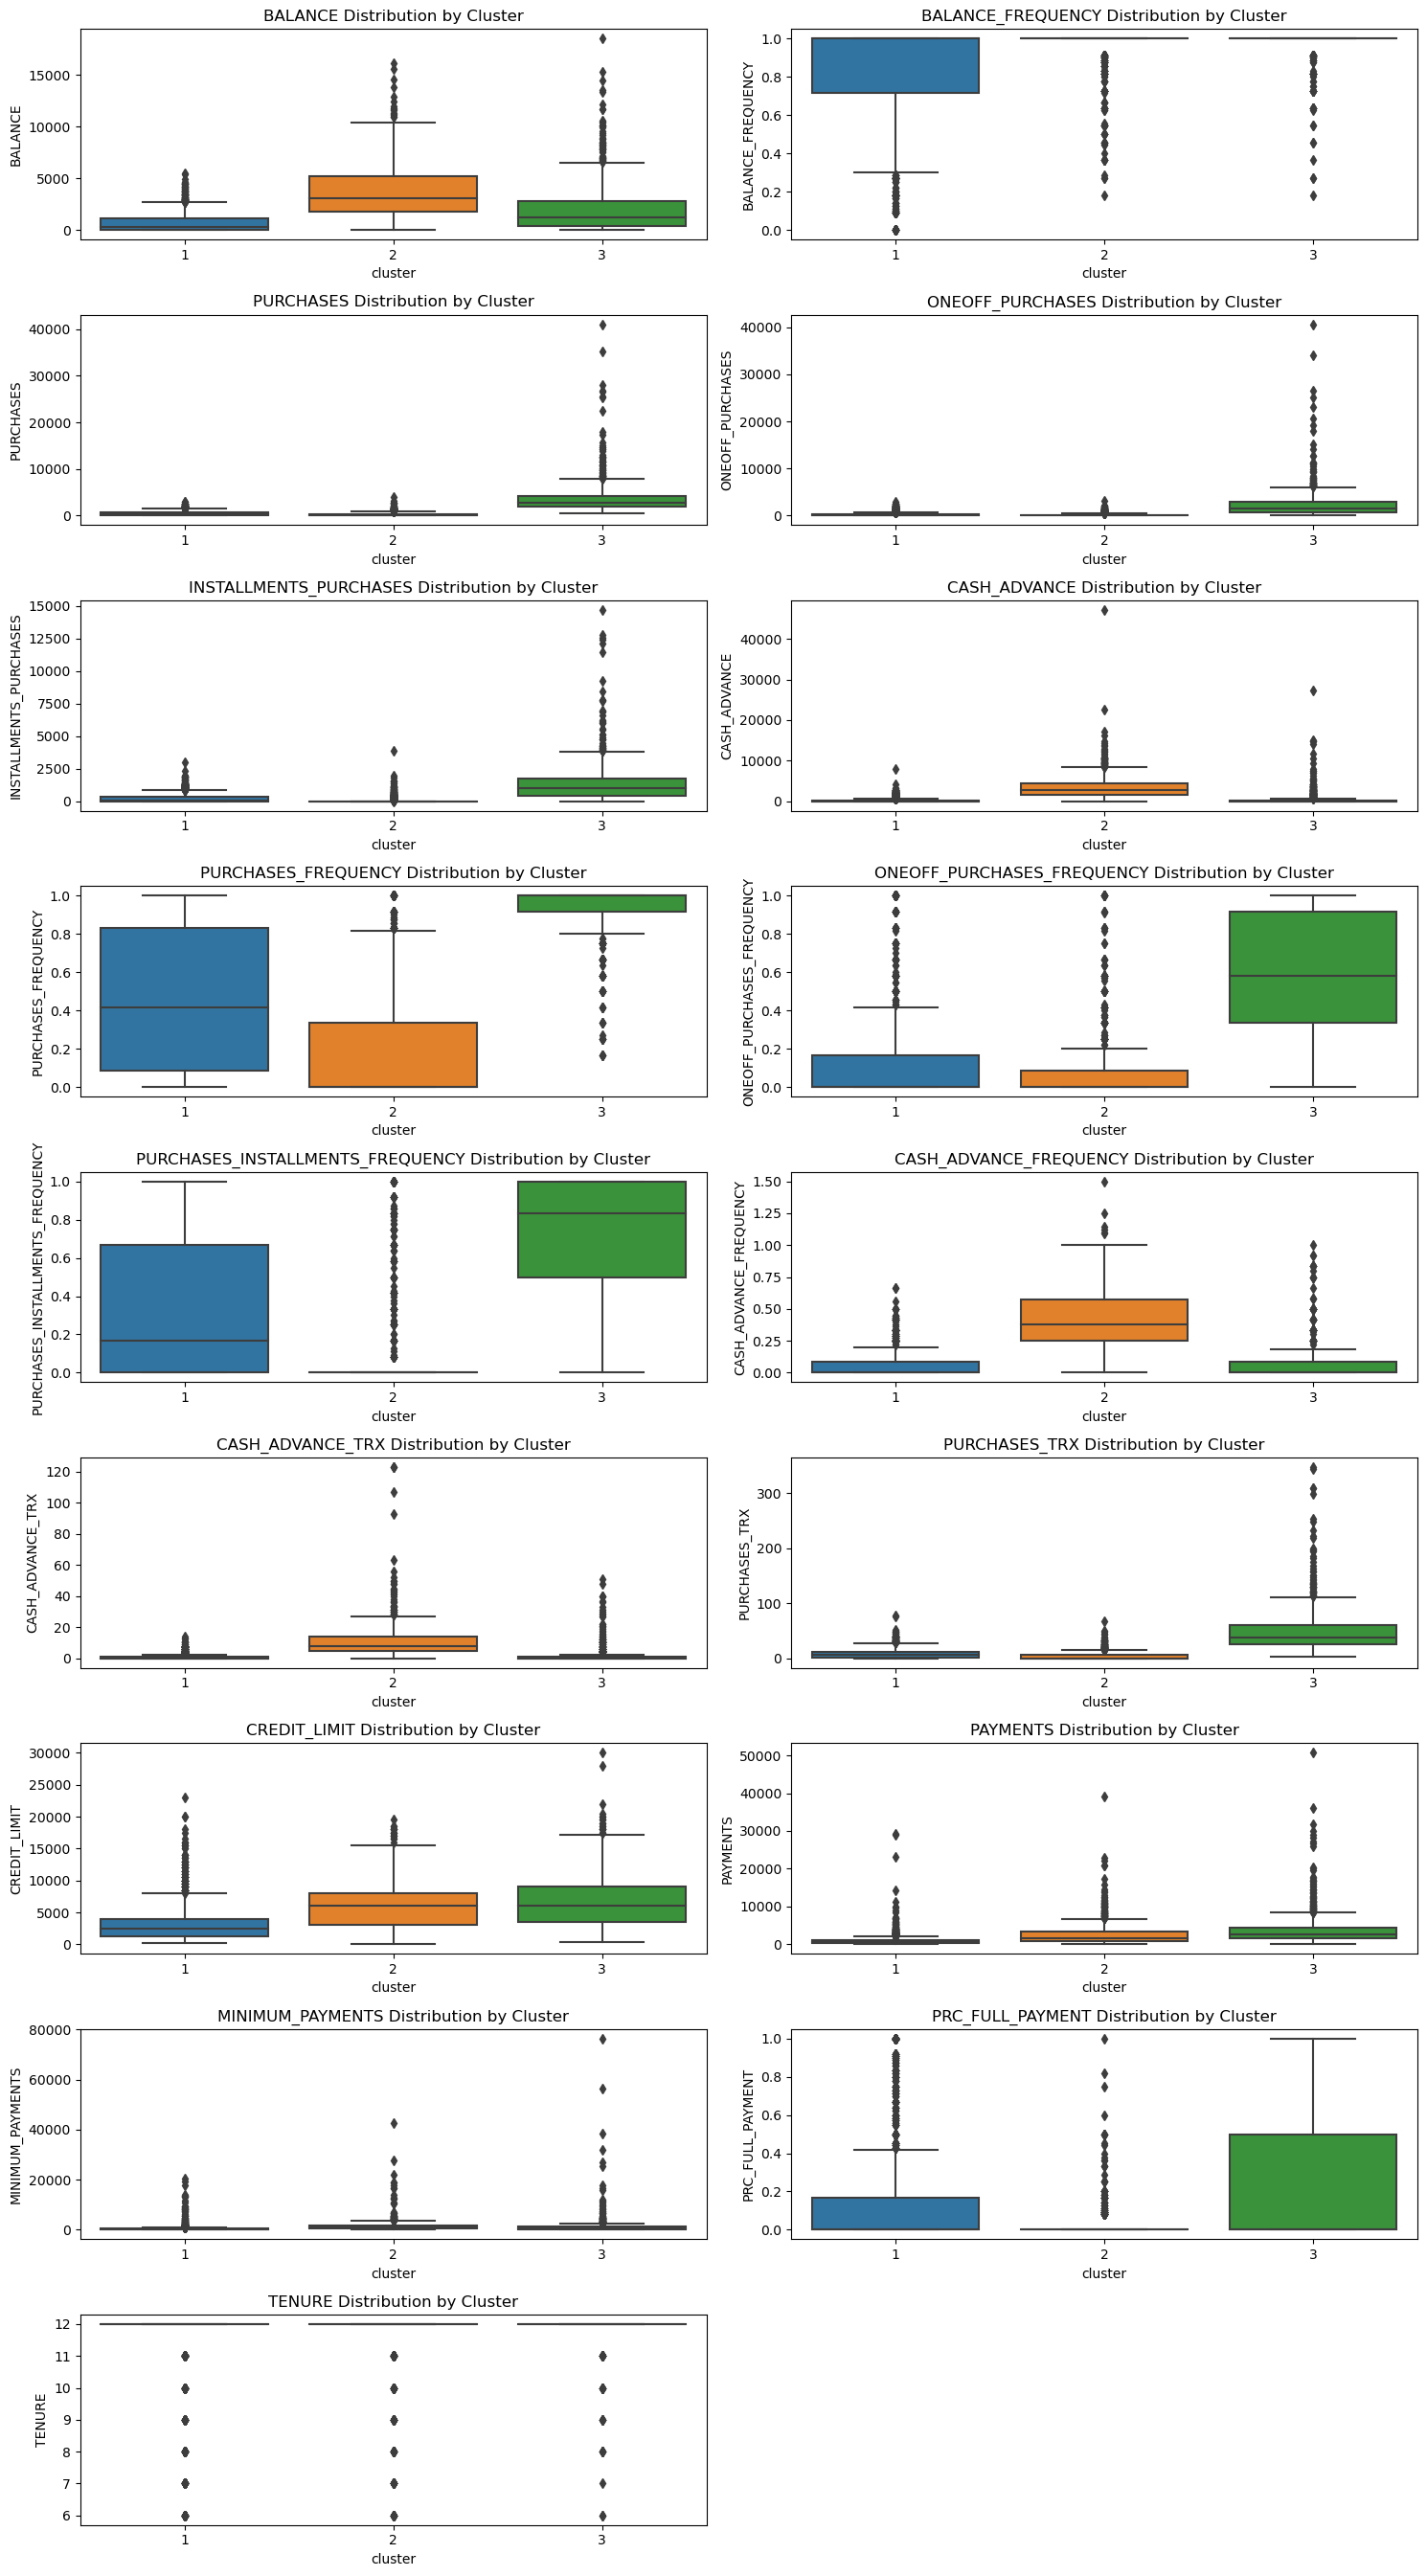

In [54]:
# Plot the boxplot for each column by cluster
# Adjust the number of rows and columns based on how many features you have
num_cols = len(df_final.columns[1:])
rows = (num_cols // 2) + (num_cols % 2)  # Determine the number of rows

plt.figure(figsize=(15, rows * 3))  # Adjust figure size based on the number of rows

for i, col in enumerate(df_final.columns[1:18]):  # Exclude the cluster column
    plt.subplot(rows, 2, i + 1)  # 2 columns, dynamic rows
    sns.boxplot(x='cluster', y=col, data=df_final)
    plt.title(f'{col} Distribution by Cluster')
    plt.tight_layout()

# Show all plots together
plt.show()

By examining each cluster for each features above, we can 
see the pattern between each clusters or **profilling the 
clusters** as follows :

| Feature | Cluster 1 (Conservative Users) | Cluster 2 (Revolving Credit Users) | Cluster 3 (High-Value Active Users) |
|---------|--------------------------------|------------------------------------|------------------------------------|
| Balance | Low | Moderate | High |
| Credit Limit | Low | Moderate | High |
| Balance Usage Frequency | Moderate | High | Moderate to High |
| Purchases | Low | Low to Moderate | High |
| One-off Purchases | Low | Low | High |
| Cash Advances | Low | High | Moderate |
| Purchase Frequency | Moderate | Low | High |
| Installment Purchases | Low to Moderate | Low | High |
| Tenure | Similar | Similar | Similar |
| Payments | Low | Moderate | High |
| Minimum Payments | Low | Moderate | High |
| Full Payment Percentage | Low | Low | High |


**Cluster 1 (Conservative Users):**
Lower-income or more conservative credit users. They have lower credit limits, make fewer and smaller purchases, and rarely use cash advances.

**Cluster 2 (Revolving Credit Users):**
Revolving credit users who frequently carry a balance and use cash advances more often, but don't make large purchases. They might be using credit cards for short-term financing or cash flow management.

**Cluster 3 (High-Value Active Users):**
High-value, active credit users with the highest credit limits. They make frequent and large purchases (both regular and installment) and have the highest payment amounts. They use their cards extensively but also tend to pay in full more often, suggesting they might be reward-seekers or using credit for convenience rather than financing.

---
Therefore, from output above, I would like to call each cluster as follows :

**Cluster 1: "Conservative Users"**
This group uses credit conservatively and minimally. They have lower balances, make fewer purchases, and generally seem to be cautious or limited in their credit card usage.


**Cluster 2: "Borrowers Users"**
This cluster frequently carries balances and uses cash advances more often, suggesting they use credit cards as a borrowing tool, possibly for short-term financing needs.


**Cluster 3: "Power Users"**
This group maximizes their credit card usage with high limits, frequent large purchases, and high payment amounts. They appear to be confident and active credit card users, possibly leveraging rewards or using credit for convenience rather than necessity.

Finally, we can map the labels into our dataframe based on that profile as follows :

In [55]:
# Map the cluster labels to profile categories
cluster_mapping = {
    1: "Conservative Users",
    2: "Borrowers Users",
    3: "Power Users"
}

# Apply the mapping to the final dataframe
df_final['cluster_label'] = df_final['cluster'].map(cluster_mapping)

# Display the first 10 rows of the final dataframe
df_final.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cluster_label
0,1,1854.033230,1.000000,1013.50,576.00,437.50,1243.093189,0.500000,0.083333,0.333333,0.083333,5,15,2000.0,654.473825,1524.375697,0.000000,12,1,Conservative Users
1,3,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11,1,Conservative Users
2,5,21.580264,0.909091,284.72,0.00,284.72,0.000000,0.666667,0.000000,0.666667,0.000000,0,16,5000.0,344.161416,155.792859,0.800000,12,1,Conservative Users
3,7,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12,1,Conservative Users
4,9,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333,12,3,Power Users
5,11,89.708187,1.000000,1808.60,1808.60,0.00,450.417925,0.916667,0.916667,0.000000,0.166667,3,26,7500.0,1890.186096,139.117341,0.444444,12,3,Power Users
6,13,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,3,3,3000.0,577.725789,1683.482088,0.000000,12,2,Borrowers Users
7,15,5429.372649,1.000000,493.10,0.00,493.10,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,12000.0,1415.589572,1440.327788,0.000000,12,1,Conservative Users
8,17,1381.080028,1.000000,360.00,0.00,360.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,115.649241,13564.391210,0.000000,12,1,Conservative Users
9,19,237.344299,1.000000,1266.03,170.00,1096.03,0.000000,1.000000,0.083333,1.000000,0.000000,0,46,1800.0,729.118157,189.433393,0.500000,12,3,Power Users


## X. Model Saving

In this section, we will save the model that we have trained to be used for model inference later on. We will save the model using the pickle and json library.

In [56]:
# save the model that has been created
with open('model_pca.pkl', 'wb') as file_1:
    pickle.dump(pca_9_feats, file_1)

# save the scaler that has been fitted
with open('scaler.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2)

# save the outlier handler that has been fitted
with open('outlier_handler.pkl', 'wb') as file_3:
    pickle.dump(outlier_handler, file_3)

with open('outliers_cols_list.txt', 'w') as file_8:
    json.dump(outliers_cols_list, file_8)

# save the model that has been created
with open('model_kmeans.pkl', 'wb') as file_7:
    pickle.dump(km, file_7)

## XI. Model Inference

Model inference will be done on another notebook called 'P1G6_model_inference.ipynb'

## XII. Conclusion

The objective of this project was to perform customer segmentation on credit card usage data to identify at least 3 distinct customer clusters and to provide actionable business recommendations for each segment. The project is aimed to be completed within 2 weeks, enabling the marketing team to implement targeted marketing strategies and enhance customer engagement. Based on the objective, we have successfully create a three dinstinct customer clusters namely : "Conservative Users", "Borrowers Users", and "Power Users".


Therefore, our recommendations for each customer segment for market strategy can be used as follows :
1. **Conservative Users** (This group uses credit conservatively and minimally):      
- Offer financial education programs to build credit confidence  
- Introduce low-risk credit-building products  
- Promote small, regular purchase to encourage more frequent card use  
- Consider partnering with essential service providers for automatic bill payments to increase usage  

2. **Borrowers Users** (These customers rely on credit for short-term financing):      
- Introduce flexible payment plans or low-interest short-term loans  
- Provide budgeting tools and financial planning resources since they usually used credit for short-term financing needs  
- Consider implementing an early warning system if they are at risk of defaulting a credit

3. **Power Users** (These customers are high-value, actively using their cards for large purchases):  
- Offer premium services or exclusive perks for high-value customers  
- Provide personalized spending analysis and financial advice since they are premium user  
- Offer bonus rewards or benefits for reaching certain spending thresholds, this will makes them even more active with the card


The key takeaways here is we should implement personalized marketing strategy for each segment with different approach, based on the characteristics of each segment. This will help to improve customer engagement and loyalty, and ultimately drive business growth.

`Further improvement :`
To further improve this project, there are few things to consider or some recommendations for future work:  
- Different clustering algorithms  
Try other clustering algorithms like DBSCAN, Agglomerative Clustering, or Gaussian Mixture Models to see if they produce different results. Consider that in k-means, the number of clusters must be specified in advance, which may not always be optimal, while other algorithms can determine the number of clusters automatically like DBSCAN "maybe" more suitable for this case since we don't know the number of clusters in advance. Also, maybe the original data can be separated with density based or other clustering algorithm.

- Feature engineering  
Here, we don't do feature selection because we will use PCA later on, but maybe we can try to do feature selection to reduce the unused features, maybe this will lead to different results. Also, we can try to engineer new features from the existing ones to see if we can improve the clustering results.

- Selecting highly correlated features only for profilling  
In this project, we define the profile of each clusters by looking at all the features, this is because we want to see the overall picture of each clusters, but maybe we can try to select only the highly correlated features to see if maybe a "different" profile can be defined for each clusters.

- Hyperparameter tuning  
Here, we dont really put much effort in hyperparameter tuning other than the number of component in PCA and number of clusters in KMeans, maybe we can try to do hyperparameter tuning for each model to see if we can get another results.

- Extend Project Timeline:  
This project was completed within a limited timeframe, therefore, there are still a lots of things that can be explored further. Extending the project timeline would allow for more in-depth analysis.